<a href="https://colab.research.google.com/github/saanvi-17/style-tranfer/blob/master/python_basics%2Cipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pie chart, Histogram and bar chart in python
In this program we have used libraries like matplotlib,pandas and seaborn to implement pie chart,histogram and bar chart 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset that we are using contains a list of video games with sales in different countries for more than 16500 games.

In [0]:
vgsales='vgsales.csv'
df=pd.read_csv(vgsales)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [0]:
df.shape

(16598, 11)

Now, we check whether there are any null values present in our data set.

In [0]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Since there are a few null values in Publisher and year column so we get rid of these rows because these values cannot be replaced, and now there are no null values left in the data set.

In [0]:
df.dropna(inplace=True)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

We have created another dataframe with the name 'df_n' and this data set contains Name of the video Games, sales in North America,Europe and other countries along with their Global sales

In [0]:
df_new=df[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
df_new

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,0.00,0.01,0.00,0.00,0.01


we take the top five values and save them in another data frame 'df_top'

In [0]:
df_top=df_new.head()
df_top


,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37


we set the name column as index for easy accessibility.

In [0]:
df_top.set_index('Name',inplace=True)


# Pie Chart
creating a pie chart for five video games.

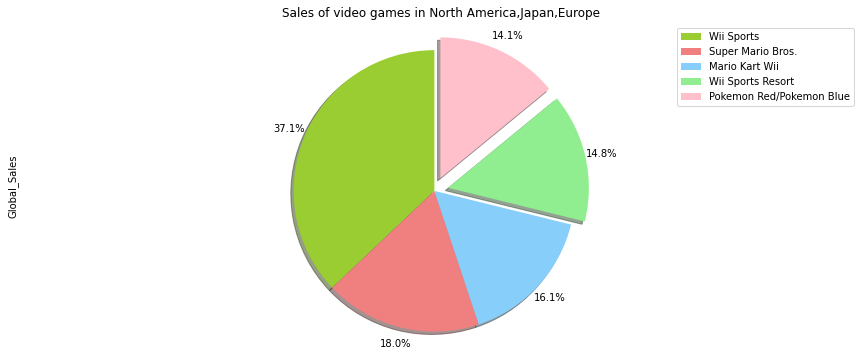

In [0]:
colors_list = [ 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

explode_list=[0,0,0,0.1,0.1]
df_top['Global_Sales'].plot(kind='pie',
                     figsize=(15,6),
                     autopct='%1.1f%%', # add in percentages
                     startangle=90,     # start angle 90° (Africa)
                     shadow=True,      # add shadow      
                     labels=None,         # turn off labels on pie chart
                     pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                     explode=explode_list,
                     colors=colors_list)

plt.title('Sales of video games in North America,Japan,Europe')
plt.axis('equal')
plt.legend(labels=df_top.index, loc='upper right') 


The pie chart is done highlighting the two video games with least sales.

In [0]:
df.set_index('Name',inplace=True)
df

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,,,
Wii Sports,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
Super Mario Bros.,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
Mario Kart Wii,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
Wii Sports Resort,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
Pokemon Red/Pokemon Blue,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
Woody Woodpecker in Crazy Castle 5,16596,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
Men in Black II: Alien Escape,16597,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
SCORE International Baja 1000: The Official Game,16598,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


# Histogram
To make a histogram we take another data frame and find its transpose.

In [0]:
Sales=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
df_G=df.loc[['Halo 4','Wii Sports','Super Mario Land'],Sales].transpose()
df_G

Name,Halo 4,Wii Sports,Super Mario Land
NA_Sales,6.63,41.49,10.83
EU_Sales,2.36,29.02,2.71
JP_Sales,0.04,3.77,4.18
Other_Sales,0.73,8.46,0.42


Text(0.5, 1.0, 'Histogram of sales of Halo 4,Wii Sports,super mario land')

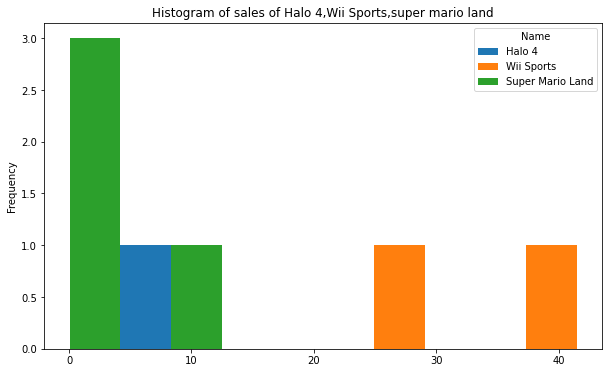

In [0]:
df_G.plot(kind='hist',figsize=(10,6))

plt.title('Histogram of sales of Halo 4,Wii Sports,super mario land')

# Bar Graph
we use another dataframe to create a bar graph for sale of a single video game in different countries.

In [0]:
df_b=df.loc[['Tekken 3'],Sales].transpose()
df_b

Name,Tekken 3
NA_Sales,3.27
EU_Sales,2.22
JP_Sales,1.40
Other_Sales,0.29


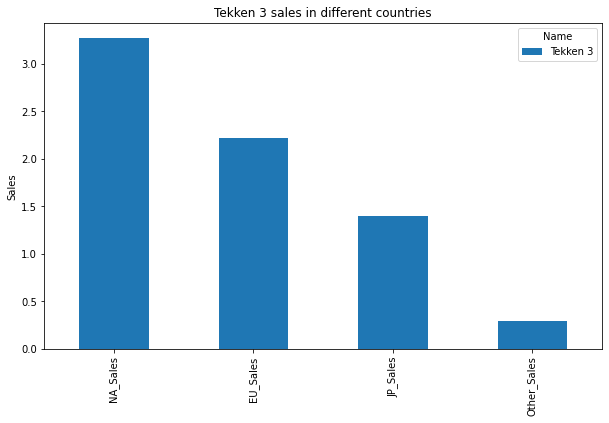

In [0]:
df_b.plot(kind='bar', figsize=(10, 6))


plt.ylabel('Sales') # add y-label to the plot
plt.title('Tekken 3 sales in different countries') # add title to the plot

plt.show()